In [274]:
pip install --user googlemaps requests pandas numpy matplotlib openpyxl scikit-learn utm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [465]:
import pandas as pd

In [466]:
df = pd.read_csv('data/NYC_museums.csv')
df.head()

,the_geom,NAME,TEL,URL,ADRESS1,ADDRESS2,CITY,ZIP,FREE
0,POINT (-74.01375579519738 40.703816216918035),Alexander Hamilton U.S. Custom House,(212) 514-3700,http://www.oldnycustomhouse.gov/,1 Bowling Grn,NaN,New York,"10,004",False
1,POINT (-74.06303178855111 40.615120837755356),Alice Austen House Museum,(718) 816-4506,http://www.aliceausten.org/,2 Hylan Blvd,NaN,Staten Island,"10,305",False
2,POINT (-73.94729768541572 40.833853500753314),American Academy of Arts and Letters,(212) 368-5900,http://www.artsandletters.org/,633 W. 155th St.,NaN,New York,"10,032",False
3,POINT (-73.97810302110001 40.76162497138548),American Folk Art Museum,(212) 265-1040,http://www.folkartmuseum.org/,45 West 53rd Street,NaN,New York,"10,019",True
4,POINT (-74.0396848374904 40.69905626244391),American Immigration History Center,(212) 363-3200,http://www.ellisisland.org/,Ellis Island,NaN,New York,0,False


In [467]:
df.columns

Index(['the_geom', 'NAME', 'TEL', 'URL', 'ADRESS1', 'ADDRESS2', 'CITY', 'ZIP',
       'FREE'],
      dtype='object')

In [468]:
df.describe()

,the_geom,NAME,TEL,URL,ADRESS1,ADDRESS2,CITY,ZIP,FREE
count,130,130,128,130,130,15,130,130,130
unique,130,130,123,129,123,15,7,59,2
top,POINT (-74.01375579519738 40.703816216918035),Alexander Hamilton U.S. Custom House,(212) 514-3700,http://www.ellisisland.org/,15 W. 16th St.,11th Floor,New York,"10,011",False
freq,1,1,2,2,6,1,89,9,124


In [469]:
# Only need name and location
cols = [
    "the_geom",
    "NAME"
]

df = df[cols].dropna()
df.head()

,the_geom,NAME
0,POINT (-74.01375579519738 40.703816216918035),Alexander Hamilton U.S. Custom House
1,POINT (-74.06303178855111 40.615120837755356),Alice Austen House Museum
2,POINT (-73.94729768541572 40.833853500753314),American Academy of Arts and Letters
3,POINT (-73.97810302110001 40.76162497138548),American Folk Art Museum
4,POINT (-74.0396848374904 40.69905626244391),American Immigration History Center


In [470]:
df.describe()

,the_geom,NAME
count,130,130
unique,130,130
top,POINT (-74.01375579519738 40.703816216918035),Alexander Hamilton U.S. Custom House
freq,1,1


In [471]:
df = df.rename(columns={
    "NAME": "name",
    "ADDRESS2": "address",
    "FREE": "free",
})

In [472]:
coords = (
    df["the_geom"]
    .str.replace("POINT (", "", regex=False)
    .str.replace(")", "", regex=False)
    .str.split(" ", expand=True)
)

df["lon"] = coords[0].astype(float)
df["lat"] = coords[1].astype(float)

df[["lat", "lon"]].head()

,lat,lon
0,40.703816,-74.013756
1,40.615121,-74.063032
2,40.833854,-73.947298
3,40.761625,-73.978103
4,40.699056,-74.039685


In [473]:
df["indoor"] = True
df["museum"] = True
df

,the_geom,name,lon,lat,indoor,museum
0,POINT (-74.01375579519738 40.703816216918035),Alexander Hamilton U.S. Custom House,-74.013756,40.703816,True,True
1,POINT (-74.06303178855111 40.615120837755356),Alice Austen House Museum,-74.063032,40.615121,True,True
2,POINT (-73.94729768541572 40.833853500753314),American Academy of Arts and Letters,-73.947298,40.833854,True,True
3,POINT (-73.97810302110001 40.76162497138548),American Folk Art Museum,-73.978103,40.761625,True,True
4,POINT (-74.0396848374904 40.69905626244391),American Immigration History Center,-74.039685,40.699056,True,True
...,...,...,...,...,...,...
125,POINT (-73.99388579658319 40.73807723317813),American Sephardi Federation / Sephardic House,-73.993886,40.738077,True,True
126,POINT (-73.99379427245329 40.73795994708654),YIVO Institute for Jewish Research,-73.993794,40.737960,True,True
127,POINT (-73.99392890421056 40.738015384101416),American Jewish Historical Society,-73.993929,40.738015,True,True
128,POINT (-73.99381737049632 40.738045683847),Yeshiva University Museum,-73.993817,40.738046,True,True


In [474]:
import utm
coords = [
    utm.from_latlon(lat, lon)
    for lat, lon in zip(df["lat"], df["lon"])
]

df[["easting", "northing", "zone_number", "zone_letter"]] = coords

In [475]:
df = df.drop(columns=["the_geom", "zone_number", "zone_letter"])
df

,name,lon,lat,indoor,museum,easting,northing
0,Alexander Hamilton U.S. Custom House,-74.013756,40.703816,True,True,583315.457106,4506346.35643
1,Alice Austen House Museum,-74.063032,40.615121,True,True,579257.6019,4496455.143009
2,American Academy of Arts and Letters,-73.947298,40.833854,True,True,588756.555795,4520846.666029
3,American Folk Art Museum,-73.978103,40.761625,True,True,586252.66999,4512797.956947
4,American Immigration History Center,-74.039685,40.699056,True,True,581130.780345,4505793.704304
...,...,...,...,...,...,...,...
125,American Sephardi Federation / Sephardic House,-73.993886,40.738077,True,True,584950.478136,4510168.593108
126,YIVO Institute for Jewish Research,-73.993794,40.737960,True,True,584958.355254,4510155.662103
127,American Jewish Historical Society,-73.993929,40.738015,True,True,584946.917004,4510161.685713
128,Yeshiva University Museum,-73.993817,40.738046,True,True,584956.29587,4510165.15713


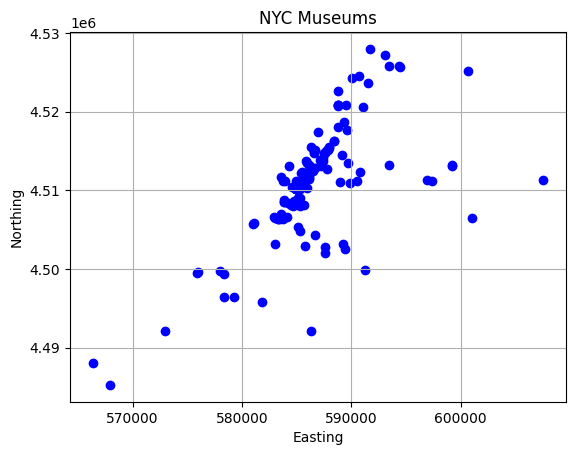

In [476]:
import matplotlib.pyplot as plt

plt.scatter(df["easting"], df["northing"], c='blue', marker='o')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
plt.grid()
plt.show()

In [ ]:
start_lat = input("Enter your starting address latitude: ")
start_lon = input("Enter your starting address longitude: ")

In [ ]:
end_lat = input("Enter your ending address latitude: ")
end_lon = input("Enter your ending address longitude: ")

In [477]:
num_locations = 3

In [478]:
start_lat = 40.7095
start_lon = -74.0145

end_lat = 40.7424
end_lon = -74.0061

In [479]:
data = {"name": ["start", "end"], "lat": [float(start_lat), float(end_lat)], "lon": [float(start_lon), float(end_lon)],
        "easting": [utm.from_latlon(float(start_lat), float(start_lon))[0], utm.from_latlon(float(end_lat), float(end_lon))[0]],
        "northing": [utm.from_latlon(float(start_lat), float(start_lon))[1], utm.from_latlon(float(end_lat), float(end_lon))[1]],}
df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)

In [480]:
start_idx = df.index[(df["name"] == "start")][0]
print(start_idx)
end_idx = df.index[df["name"] == "end"][0]
print(end_idx)

130
131


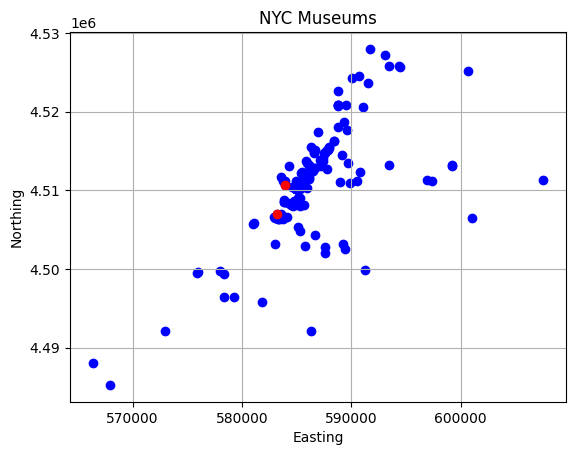

In [481]:
plt.figure()
plt.scatter(df["easting"], df["northing"], c='blue', marker='o')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
plt.scatter(df["easting"].iloc[start_idx], df["northing"].iloc[start_idx], c='red', marker='o')
plt.scatter(df["easting"].iloc[end_idx], df["northing"].iloc[end_idx], c='red', marker='o')
plt.grid()
plt.show()


In [482]:
# want to look at closest 10 points
from sklearn.neighbors import BallTree
import numpy as np

coords = np.radians(df[["lat", "lon"]].values)
tree = BallTree(coords, metric = "haversine")

# Find nearest 10 neighbors
dist, ind = tree.query(coords, k=10)


In [483]:
R = 6371.2 # Earth's radius in kilometers
dist = dist * R # Convert to kilometers

In [484]:
transport = "walk"

In [485]:
if transport == "walk":
    # Apply walking speed (5 km/h) to convert distance to time
    time = dist / 5  # Time in hours
else:
    # Apply driving speed (50 km/h) to convert distance to time
    time = dist / 50  # Time in hours

In [507]:
def haversine_dist(lat1, lon1, lat2, lon2):
    lat1, lon1 = np.radians(lat1), np.radians(lon1)
    lat2, lon2 = np.radians(np.array(lat2, dtype=float)), np.radians(np.array(lon2, dtype=float))

    dlat = lat2-lat1
    dlon = lon2-lon1

    havc = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    d = 2 * R * np.arcsin(np.sqrt(havc))
    return d

In [508]:
# greedy approach, take closest point to each starting from start point
def greedy_alg(df, start_idx, end_idx, num_locations):
    visited = [start_idx, end_idx]
    itinerary = [start_idx]
    current_idx = start_idx
    total_dist = 0

    for _ in range(num_locations):
        next_dists = haversine_dist(
            df.loc[current_idx, "lat"], df.loc[current_idx, "lon"],
            df["lat"].values, df["lon"].values
        )
        next_dists[list(visited)] = np.inf  # Ignore already visited locations
        next_idx = np.argmin(next_dists)
        total_dist += next_dists[next_idx]
        itinerary.append(next_idx)
        visited.append(next_idx)
        current_idx = next_idx

    itinerary.append(end_idx)
    total_dist += haversine_dist(
        df.loc[current_idx, "lat"], df.loc[current_idx, "lon"],
        end_lat, end_lon
    )
    return itinerary, total_dist

In [509]:
ny_itinerary, total_dist = greedy_alg(df, start_idx, end_idx, num_locations)

In [510]:
print(ny_itinerary)
full_itinerary = df.iloc[ny_itinerary]["name"]
print(full_itinerary)
print("Total distance (km):", total_dist)

[np.int64(130), np.int64(80), np.int64(66), np.int64(84), np.int64(131)]
130                                                start
80     National September 11 Memorial & Museum at the...
66                            Museum of American Finance
84                           New York City Police Museum
131                                                  end
Name: name, dtype: object
Total distance (km): 5.362389604362357


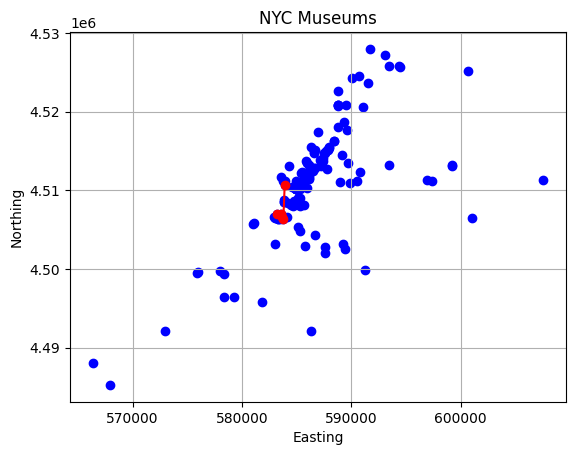

In [511]:
plt.scatter(df["easting"], df["northing"], c='blue', marker='o')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
plt.plot(df["easting"].iloc[ny_itinerary], df["northing"].iloc[ny_itinerary], c='red', marker='o')
plt.grid()
plt.show()

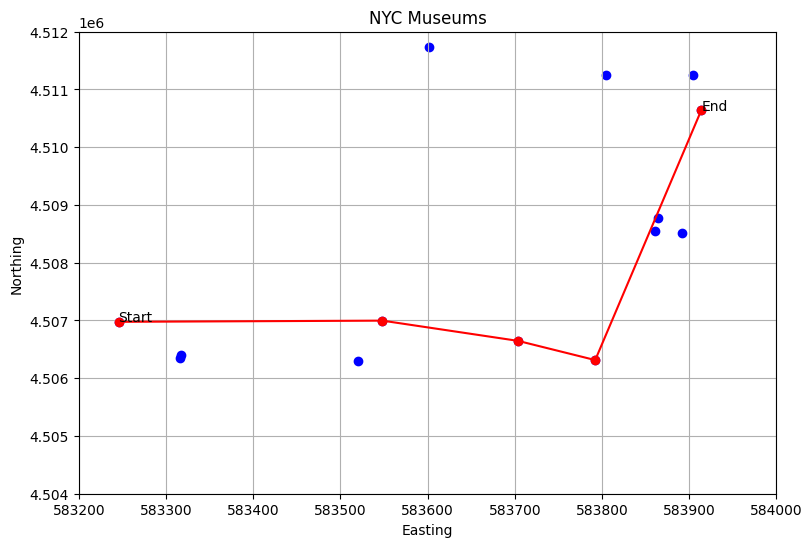

In [512]:
fig, ax = plt.subplots(figsize = (9,6))
plt.scatter(df["easting"], df["northing"], c='blue', marker='o')
plt.xlim(583200, 584000)
plt.ylim(4.504*10**6, 4.512*10**6)
plt.plot(df["easting"].iloc[ny_itinerary], df["northing"].iloc[ny_itinerary], c='red', marker='o')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
ax.annotate('Start', xy=(df["easting"].iloc[start_idx]-0.0001, df["northing"].iloc[start_idx]), xytext=(df["easting"].iloc[start_idx]-0.001, df["northing"].iloc[start_idx]-0.002))
ax.annotate('End', xy=(df["easting"].iloc[end_idx]+0.0001, df["northing"].iloc[end_idx]), xytext=(df["easting"].iloc[end_idx]+0.0003, df["northing"].iloc[end_idx]+0.001))
plt.grid()
plt.show()

So not necessarily the best path - there are a few more museums they could reach that would seem more optimal

In [513]:
print(ind[start_idx])
closest = ind[start_idx]

[130  80 105  73  66  79   0  33  84 108]


In [514]:
print(dist[start_idx])

[0.         0.30261626 0.49944877 0.52080827 0.56388786 0.57954229
 0.63513336 0.72883584 0.85896735 0.96400479]


In [515]:
print(df.iloc[80])

name        National September 11 Memorial & Museum at the...
lon                                                -74.010916
lat                                                 40.709654
indoor                                                   True
museum                                                   True
easting                                         583548.090919
northing                                       4506997.138927
Name: 80, dtype: object


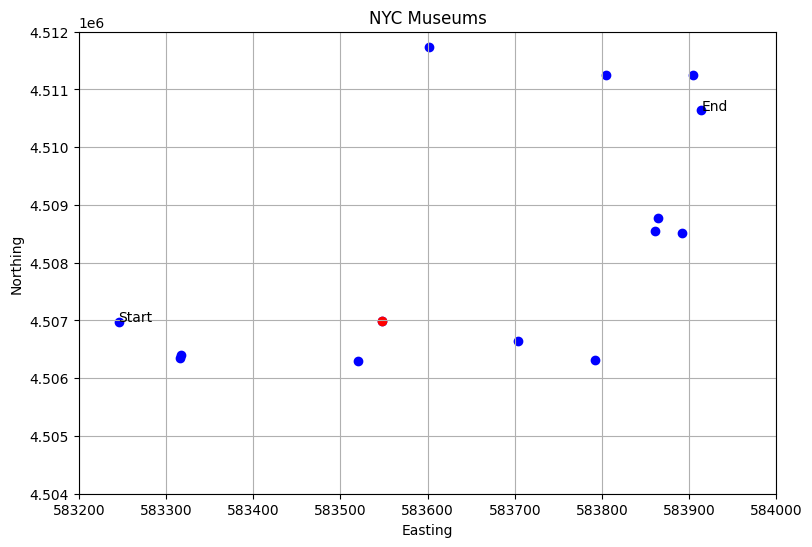

In [516]:
fig, ax = plt.subplots(figsize = (9,6))
plt.scatter(df["easting"], df["northing"], c='blue', marker='o')
plt.xlim(583200, 584000)
plt.ylim(4.504*10**6, 4.512*10**6)
plt.scatter(df["easting"].iloc[closest[1]], df["northing"].iloc[closest[1]], c='red', marker='o')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
ax.annotate('Start', xy=(df["easting"].iloc[start_idx]-0.0001, df["northing"].iloc[start_idx]), xytext=(df["easting"].iloc[start_idx]-0.001, df["northing"].iloc[start_idx]-0.002))
ax.annotate('End', xy=(df["easting"].iloc[end_idx]+0.0001, df["northing"].iloc[end_idx]), xytext=(df["easting"].iloc[end_idx]+0.0003, df["northing"].iloc[end_idx]+0.001))
plt.grid()
plt.show()

In [517]:
# can try using beam search
def beam_search(df, start_idx, end_idx, num_locations, beam_width=5):
    beams = [([start_idx], 0)]

    for _ in range(num_locations):
        new_beams = []
        for itinerary, cost in beams:
            current = itinerary[-1]
            unused = set(df.index) - set(itinerary) - {end_idx}
            for nxt in unused:
                dist = haversine_dist(
                    df.loc[current,"lat"], df.loc[current,"lon"],
                    df.loc[nxt,"lat"], df.loc[nxt,"lon"]
                )
                new_beams.append((itinerary+[nxt], cost+dist))

        beams = sorted(new_beams, key=lambda x: x[1])[:beam_width]
    total = []
    for itinerary, cost in beams:
        last = itinerary[-1]
        end = haversine_dist(
        df.loc[last, "lat"], df.loc[last, "lon"],
        end_lat, end_lon
    )
        total.append((itinerary+[end_idx], cost + end))

    best_itinerary, best_cost = min(total, key = lambda x: x[1])
    return best_itinerary, best_cost
        

In [518]:
itinerary, distance = beam_search(df, start_idx, end_idx, num_locations, beam_width=5)

In [519]:
print(itinerary)
full_itinerary = df.iloc[itinerary]["name"]
print(full_itinerary)
print(distance)

[np.int64(130), 79, 0, 33, np.int64(131)]
130                                     start
79     National Museum of the American Indian
0        Alexander Hamilton U.S. Custom House
33                     Fraunces Tavern Museum
131                                       end
Name: name, dtype: object
5.203911665150817


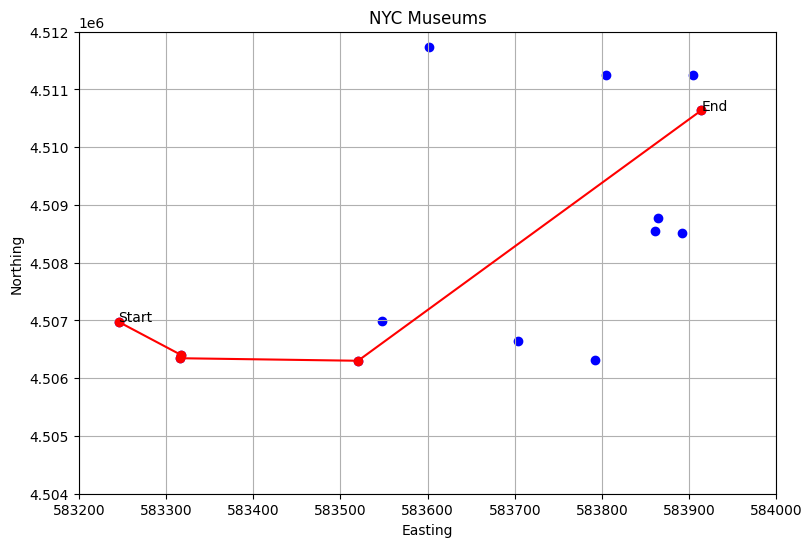

In [520]:
fig, ax = plt.subplots(figsize = (9,6))
plt.scatter(df["easting"], df["northing"], c='blue', marker='o')
plt.xlim(583200, 584000)
plt.ylim(4.504*10**6, 4.512*10**6)
plt.plot(df["easting"].iloc[itinerary], df["northing"].iloc[itinerary], c='red', marker='o')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
ax.annotate('Start', xy=(df["easting"].iloc[start_idx]-0.0001, df["northing"].iloc[start_idx]), xytext=(df["easting"].iloc[start_idx]-0.001, df["northing"].iloc[start_idx]-0.002))
ax.annotate('End', xy=(df["easting"].iloc[end_idx]+0.0001, df["northing"].iloc[end_idx]), xytext=(df["easting"].iloc[end_idx]+0.0003, df["northing"].iloc[end_idx]+0.001))
plt.grid()
plt.show()

5.2039 is even more optimized than the other distance

In [521]:
def normalize(v):
    return v/np.linalg.norm(v)

In [522]:
def point_to_path(start, end, points):
    """
    points: (n_points,2) array
    start, end: (2,) array
    Returns: perpendicular distances of all points to the line start->end
    """
    start  = start.astype(float)
    end    = end.astype(float)
    points = points.astype(float)
    se = end - start              
    se_norm2 = np.dot(se, se)   

    # vector from start to each point
    vec = points - start

    # projection length along line
    proj_len = np.dot(vec, se) / se_norm2

    # projected point on the line
    Q = start + proj_len[:, np.newaxis] * se
    # perpendicular distance
    d_perp = np.linalg.norm(points - Q, axis=1)

    return d_perp

In [523]:
# want to implement one greedy algorithm based on directions
def greedy_dir_alg(df, start_idx, end_idx, num_locations):
    visited = [start_idx, end_idx]
    itinerary = [start_idx]
    current_idx = start_idx
    total_dist = 0
    start = df.iloc[start_idx][["easting", "northing"]].values
    end = df.iloc[end_idx][["easting", "northing"]].values

    SE = end - start
    SE_norm2 = np.dot(SE, SE)
    for _ in range(num_locations):
        curr = df.iloc[current_idx][["easting", "northing"]].values
        points = df[["easting", "northing"]].values

        t_curr = np.dot(curr - start, SE) / SE_norm2
        t_all  = np.dot(points - start, SE) / SE_norm2

        valid = t_all > t_curr        # enforce forward progress
        valid[list(visited)] = False

        if not valid.any():
            break

        # distance to lines
        short_dists = point_to_path(
            curr,
            end,
            points
        )
        short_dists[~valid] = np.inf

        next_idx = np.argmin(short_dists)
        
        total_dist += np.linalg.norm(points[next_idx] - curr)
        itinerary.append(next_idx)
        visited.append(next_idx)
        current_idx = next_idx

    itinerary.append(end_idx)
    total_dist += np.linalg.norm(
        df.iloc[current_idx][["easting", "northing"]].values - end
    )
    return itinerary, total_dist

In [524]:
itinerary, distance = greedy_dir_alg(df, start_idx, end_idx, num_locations)

In [528]:
print(itinerary)
full_itinerary = df.iloc[itinerary]["name"]
print(full_itinerary)
distance = 0
for i in range(len(itinerary)-1):
    distance += haversine_dist(
        df.loc[itinerary[i-1], "lat"], df.loc[itinerary[i-1], "lon"],
        df.loc[itinerary[i], "lat"], df.loc[itinerary[i], "lon"]
    )
print(distance)

[np.int64(130), np.int64(44), np.int64(69), np.int64(5), np.int64(131)]
130                                 start
44          Intrepid Sea-Air-Space Museum
69                 Museum of Biblical Art
5      American Museum of Natural History
131                                   end
Name: name, dtype: object
13.028480083135303


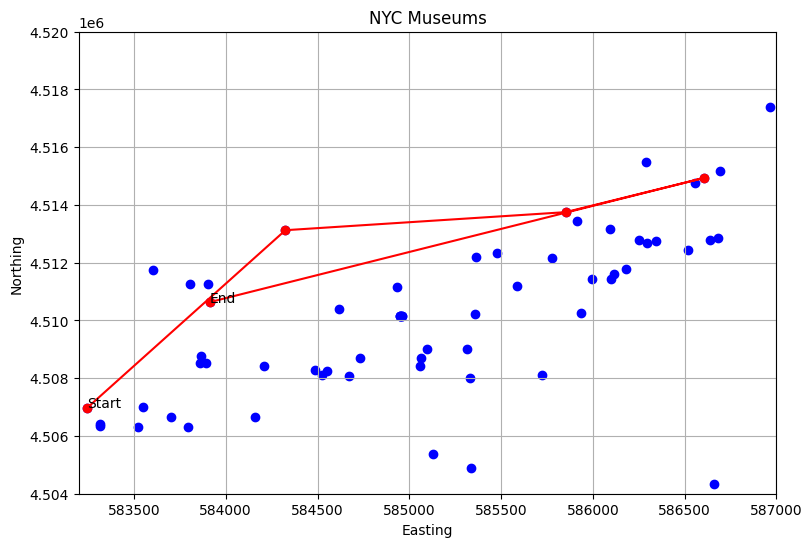

In [532]:
fig, ax = plt.subplots(figsize = (9,6))
plt.scatter(df["easting"], df["northing"], c='blue', marker='o')
plt.xlim(583200, 587000)
plt.ylim(4.504*10**6, 4.52*10**6)
plt.plot(df["easting"].iloc[itinerary], df["northing"].iloc[itinerary], c='red', marker='o')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('NYC Museums')
ax.annotate('Start', xy=(df["easting"].iloc[start_idx]-0.0001, df["northing"].iloc[start_idx]), xytext=(df["easting"].iloc[start_idx]-0.001, df["northing"].iloc[start_idx]-0.002))
ax.annotate('End', xy=(df["easting"].iloc[end_idx]+0.0001, df["northing"].iloc[end_idx]), xytext=(df["easting"].iloc[end_idx]+0.0003, df["northing"].iloc[end_idx]+0.001))
plt.grid()
plt.show()